In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [25]:
img = cv2.imread('../image/digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

(50, 100, 20, 20)


In [27]:
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)

(5000, 400)


In [28]:
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

(5000, 1)


In [29]:
np.savez('trained.npz', train = train, train_labels = train_labels)

In [30]:
cv2.imwrite('../image/test_0.png', x[0, 0])
cv2.imwrite('../image/test_1.png', x[5, 0])
cv2.imwrite('../image/test_2.png', x[10, 0])
cv2.imwrite('../image/test_3.png', x[15, 0])
cv2.imwrite('../image/test_4.png', x[20, 0])
cv2.imwrite('../image/test_5.png', x[25, 0])
cv2.imwrite('../image/test_6.png', x[30, 0])
cv2.imwrite('../image/test_7.png', x[35, 0])
cv2.imwrite('../image/test_8.png', x[40, 0])
cv2.imwrite('../image/test_9.png', x[45, 0])

True

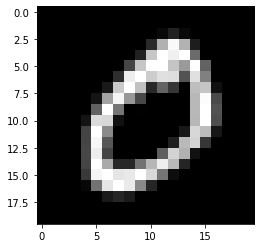

[[0.]]


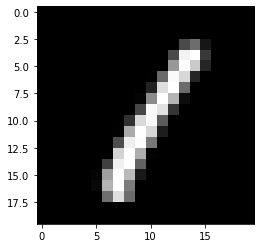

[[1.]]


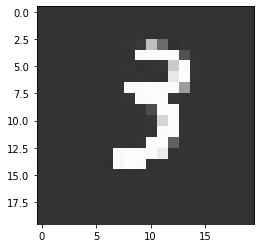

[[3.]]


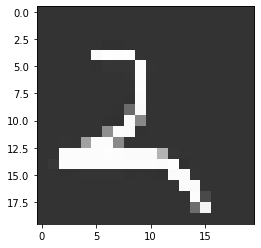

[[2.]]


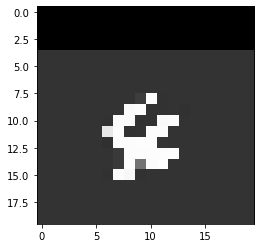

[[6.]]


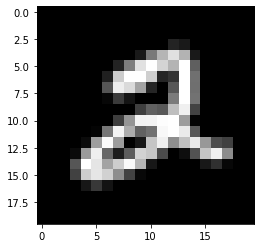

[[2.]]


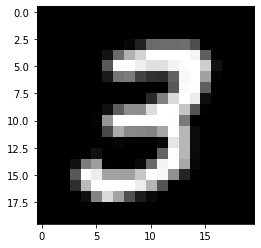

[[3.]]


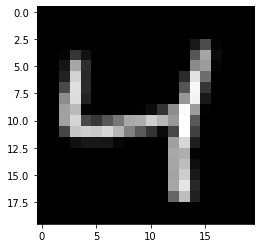

[[4.]]


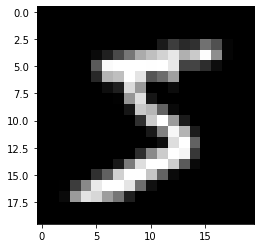

[[5.]]


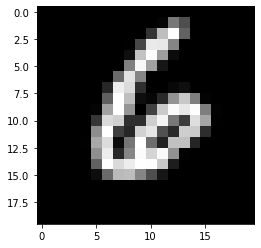

[[6.]]


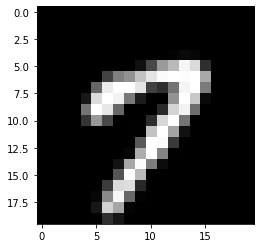

[[7.]]


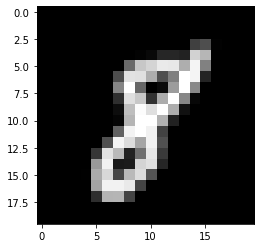

[[8.]]


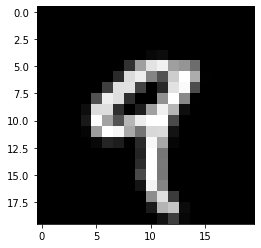

[[9.]]


In [31]:
FILE_NAME = 'trained.npz'
# 파일로부터 학습 데이터를 불러옵니다.
def load_train_data(file_name):
    with np.load(file_name) as data:
        train = data['train']
        train_labels = data['train_labels']
    return train, train_labels

# 손 글씨 이미지를 (20 x 20) 크기로 Scaling합니다.
def resize20(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_resize = cv2.resize(gray, (20, 20))
    plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
    plt.show()
    # 최종적으로는 (1 x 400) 크기로 반환합니다.
    return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
    knn = cv2.ml.KNearest_create()
    knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
    # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
    ret, result, neighbours, dist = knn.findNearest(test, k=5)
    return result

train, train_labels = load_train_data(FILE_NAME)
for file_name in glob.glob('../image/test_*.png'):
    test = resize20(file_name)
    result = check(test, train, train_labels)
    print(result)